<a href="https://colab.research.google.com/github/nishu-mns/ML-Labs/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Features
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
# Labels
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
data = {
    "Outlook": Outlook,
    "Temperature": Temperature,
    "Humidity": Humidity,
    "Wind": Wind,
    "Play": Play
}
df = pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
# create the label encoder
encoder = LabelEncoder()

df["Outlook"] = encoder.fit_transform(df["Outlook"])
df["Temperature"] = encoder.fit_transform(df["Temperature"])
df["Humidity"] = encoder.fit_transform(df["Humidity"])
df["Wind"] = encoder.fit_transform(df["Wind"])
df["Play"] = encoder.fit_transform(df["Play"])

df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [ ]:
X = df.drop(["Play"], axis=1)
y = df["Play"]

In [ ]:
X.head()

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0


In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
model = DecisionTreeClassifier(random_state=73, max_leaf_nodes=73)

# For the exercise question (6)
# model = DecisionTreeClassifier(random_state=73, max_depth=2)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
comparison = pd.DataFrame(
    {
        "Predictions": predictions,
        "Data": y_test
    }
)
comparison

,Predictions,Data
7,0,0
12,1,1


In [ ]:
# (1) Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’
model.predict([[1, 2, 1, 0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict([[2, 0, 0, 1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
cf = confusion_matrix(y_test, predictions)
cf

array([[1, 0],
       [0, 1]])

In [ ]:
ps = precision_score(y_test, predictions)
ps

1.0

In [ ]:
acc = accuracy_score(y_test, predictions)
acc

1.0

In [ ]:
rs = recall_score(y_test, predictions)
rs

1.0

In [ ]:
# le = preprocessing.LabelEncoder()

# Outlook_encoded = le.fit_transform(Outlook)
# Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("Outlook mapping:",Outlook_name_mapping)

# Temperature_encoded = le.fit_transform(Temperature)
# Temperature_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
# print("Temperature mapping:",Temperature_name_mapping)

# Humidity_encoded = le.fit_transform(Humidity)
# Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("Humidity mapping:",Humidity_name_mapping)
# Wind_encoded = le.fit_transform(Wind)
# Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("Wind mapping:",Wind_name_mapping)
# Play_encoded = le.fit_transform(Play)
# Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print("Play mapping:",Play_name_mapping)
# print("\n\n")
# print("Weather:" ,Outlook_encoded)
# print("Temerature:" ,Temperature_encoded)
# print("Humidity:" ,Humidity_encoded)
# print("Wind:" ,Wind_encoded)
# print("Play:" ,Play_encoded)

[Text(0.4444444444444444, 0.9, 'Outlook <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = No'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = No'),
 Text(0.5555555555555556, 0.7, 'Wind <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'Temperature <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'Outlook <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'Humidity <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.555555555555

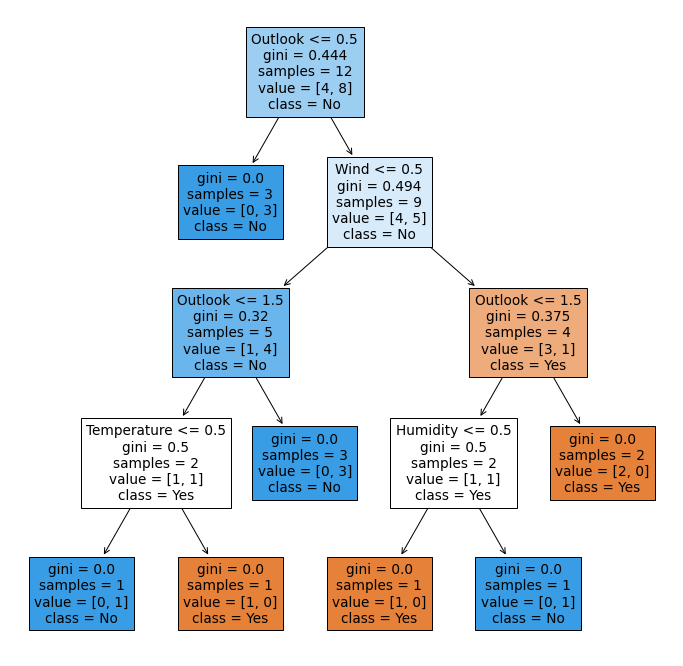

In [ ]:
plt.figure(figsize=(12, 12))
plot_tree(model, feature_names=["Outlook", "Temperature", "Humidity", "Wind"], class_names=["Yes", "No"], filled=True)

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
targets = pd.DataFrame(dataset.target.reshape(-1, 1), columns=["Result"])

In [ ]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
targets.head()

,Result
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features.values, targets.values.ravel(), test_size=0.4)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
comparison = pd.DataFrame({
    "Predictions": predictions,
    "Actual Result": y_test
})
comparison.head()

,Predictions,Actual Result
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


[Text(0.6375, 0.9375, 'X[22] <= 113.15\ngini = 0.463\nsamples = 341\nvalue = [124, 217]'),
 Text(0.425, 0.8125, 'X[7] <= 0.045\ngini = 0.165\nsamples = 231\nvalue = [21, 210]'),
 Text(0.25, 0.6875, 'X[23] <= 919.0\ngini = 0.03\nsamples = 194\nvalue = [3, 191]'),
 Text(0.2, 0.5625, 'X[14] <= 0.003\ngini = 0.021\nsamples = 193\nvalue = [2, 191]'),
 Text(0.1, 0.4375, 'X[21] <= 26.355\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.05, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.15, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.4375, 'X[21] <= 33.35\ngini = 0.011\nsamples = 188\nvalue = [1, 187]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 176\nvalue = [0, 176]'),
 Text(0.35, 0.3125, 'X[1] <= 23.2\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.3, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.1875, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.3, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.6875

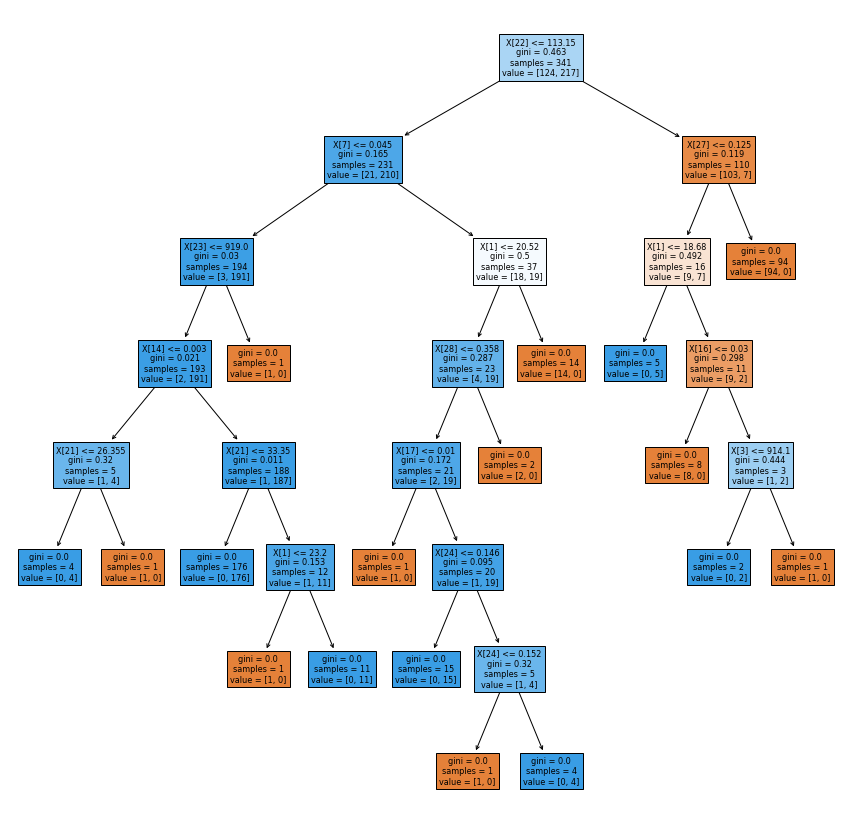

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(model, filled=True)

In [ ]:
precision_score(y_test, predictions)

0.9562043795620438

In [ ]:
accuracy_score(y_test, predictions)

0.9342105263157895

In [ ]:
recall_score(y_test, predictions)

0.9357142857142857

In [ ]:
f1_score(y_test, predictions)

0.9458483754512635

# Cost-complexity pruning

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [4]:
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(X, y)
    clfs.append(clf)
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

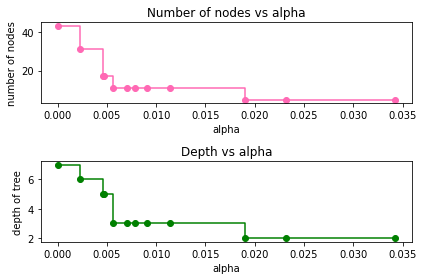

In [5]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, color="hotpink", marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depths, color="green",  marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

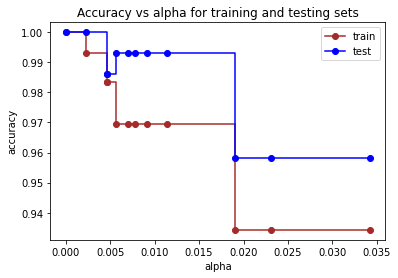

In [6]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, c="brown" , marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, c="blue" , marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [7]:
clf = DecisionTreeClassifier(ccp_alpha=0.0125, criterion='gini')

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [9]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
clf = DecisionTreeClassifier(random_state=73, max_leaf_nodes=73)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00869963, 0.01339286, 0.03571429, 0.26539835,
       0.33279549])

In [11]:
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(X, y)
    clfs.append(clf)
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008699633699633693, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.013392857142857142, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03571428571428571, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.2653983516483516, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.332795493197279, random_state=0)]

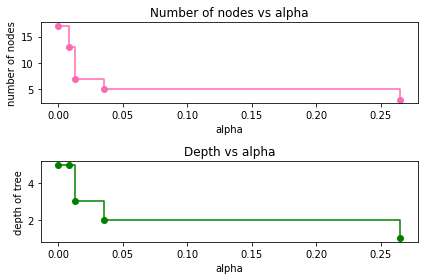

In [12]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, color="hotpink", marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depths, color="green",  marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

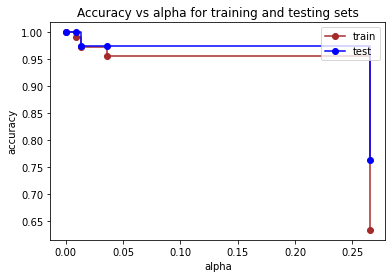

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, c="brown" , marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, c="blue" , marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()